# HW3.  Database Design

### Objectives
In this assignment, you will practice:

How to interpret, modify and correct an ER diagram, if it has a problem.

How to use Design Theory to refine a database you have designed.

How to use Normalization Theory, in particular:

How to determine which Functional Dependencies (FDs) are implied.

How to determine which Inclusion Dependencies (INDs) are implied.

How to find all candidate keys and prime attributes of the schema.

How to determine whether a given schema is in BCNF.



Useful resources for writing math in the jupyter notebook:

https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd

## Q1 (8 points, 2 points each) 

Consider the E-R diagram in the following figure for questions 1.1 to 1.4.  For each question, pick one answer from the choices offered.
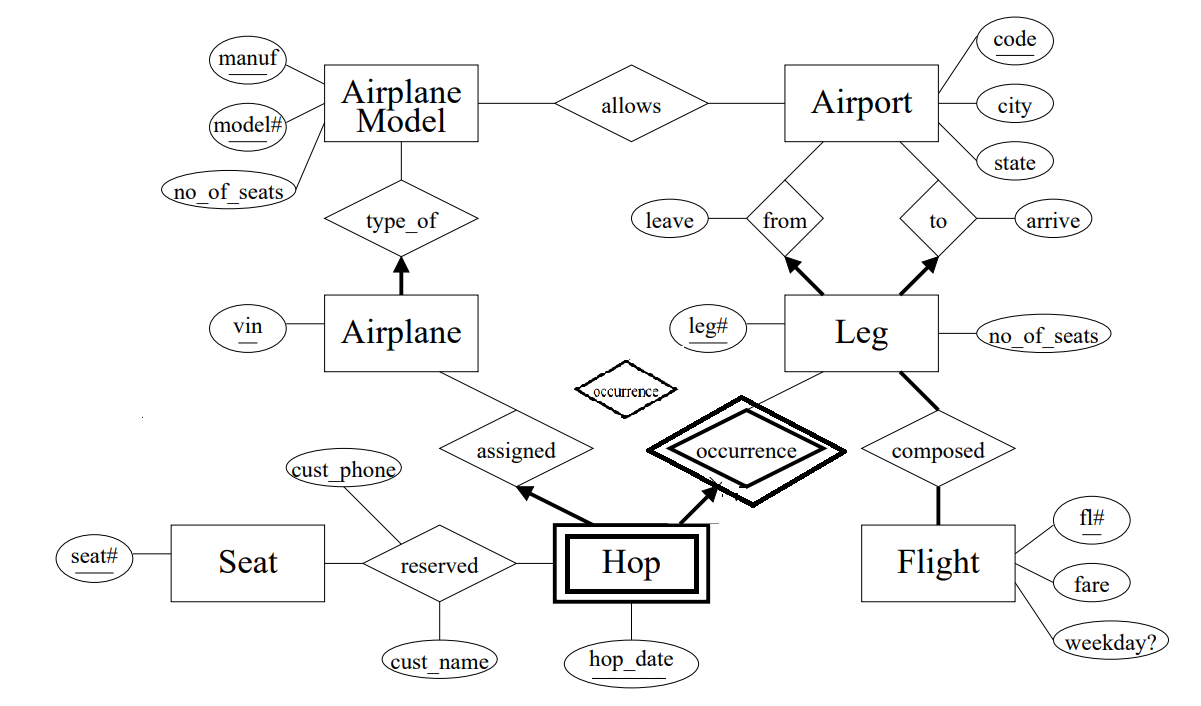


1.1 How do we know the flight (fl) to which a hop belongs?
* (d) A Hop is associated with a Leg (via occurrence). We see fl# is the key of Flight. Hence, we
know the Flight to which a Hop “belongs” via the Leg that they have in common.

1.2 How do we know what airport (code) a hop leaves from?
* (d) A Hop is associated with Leg (via occurrence). A Leg leaves from a given Airport. Hence, we know which Airport the Hop leaves from.

1.3 Which of the following seems to be a logical problem with the E-R design?
* (d) Different Airplane Models probably have different numbers of Seats; the design does not capture this.

1.4 Are we assured by the logic of the E-R diagram that the airplane assigned to a Hop (an
occurrence of a scheduled Leg) is, in fact, allowed to take off from, and to land at, the airports for
which the leg is scheduled to leave and arrive?
* (c) It depends on one’s interpretation of the diagram. Under one evident interpretation, the
answer would be “yes”. Under another, “no”.


#REPLACE WITH YOUR CHOICES FOR 1.1-1.4 (e.g., abab)#


## Q2 (10 points) 

Imagine we want to build a music database with the following characteristics:
 - An **artist** is known by their name. We also keep an artist's *genre*, *hometown*, *bio*, and *homepage* in the database.
 - An **album** has an artist. It is produced by a *recording company*.
 - An album is known by *name* of the album and the *name* of its artist. We also keep *year*, *number of tracks* (at least one), and the *recording studio* for an album.
 - An album has songs on the album. 
 - A **recording company** is known by its name. We also keep *address*, *homepage*, and *telephone number* for a *recording company*.
 - A **song** is known by its *name*, *name* of its artist, and the *album* it is part of. We also keep *length* and *track number* for the song. A song might have *guest musicians*. A song may have a *tablature*.
 - A **tablature** is known by the *URL*. We keep *date*, *transcriber*, and transcriber *email* for a tablature.
 - A **musician** is known by their *name*. A musician should have an *instrument*. We also keep *hometown* for a musician.
 - Musicians and an artist can be in a group.
 - Artists might influence a musician.
 
 Design the ERM to capture this database. Please note that you do not need to submit your ERM design, but you need to use it to answer following questions.

Q2.1 (5 points) Please list your schemas (not create table statements). Follow the style of the bank schema in HW2 for your answers.
Ensure your relations are in BCNF.
- Artist = {<span style="text-decoration:underline">artistName</span>, artistGenre, hometownArtist, bio, homepage, group<sup>FK</sup>}
- Album = {<span style="text-decoration:underline">artistName</span><sup>FK</sup>, rec_company, <span style="text-decoration:underline">albumName</span>, year, trackCount, recStudio, Song}
- Song = {songName, <span style="text-decoration:underline">artistName</span><sup>FK</sup>, <span style="text-decoration:underline">albumName</span><sup>FK</sup>, length, trackNumber, musician, Tablature}
- Tablature = {<span style="text-decoration:underline">URL</span>, date, transcriber, email}
- musician = { <span style="text-decoration:underline">musicianName</span>, hometownMusician, instrument, group<sup>FK</sup>}


Q2.2 (5 points) Please list the functional dependencies in your relations, based on your answer in Q2.1.

For the Artist relation:

artistName $\rightarrow$ {artistGenre, hometownArtist, bio, homepage, group<sup>FK</sup>}

For the Album relation:

{artistName<sup>FK</sup>, albumName} $\rightarrow$ {rec_company, year, trackCount, recStudio, Song}

For the Song relation:

{songName, artistName<sup>FK</sup>, albumName<sup>FK</sup>} $\rightarrow$ {length, trackNumber, musician, Tablature}

For the Tablature relation:

URL $\rightarrow$ {date, transcriber, email}

For the musician relation:

musicianName $\rightarrow$ {hometownMusician, instrument,group<sup>FK</sup>}

## Q3 (12 points)

Consider the following set of FDs:

$D \rightarrow AC$

$AB \rightarrow DE$

$FD \rightarrow E$

$C \rightarrow F$           

Q3.1 (6 points) Determine whether each of the following FDs is implied by the FDs above:

 (a) $EF \rightarrow BC$
 
 (b) $BC \rightarrow BF$
 
 (c) $DEF \rightarrow AB$
 
 (d) $DF \rightarrow AE$
 
 (e) $CD \rightarrow ED$
 


Answer: The implied FD are:

(b) $BC \rightarrow BF$
$B \rightarrow B$ (reflexitivity) union with  $C \rightarrow F$ (Given FD 4)
 
 
(d) $DF \rightarrow AE$ 

$D \rightarrow A$ (decomposition FD1) union with $FD \rightarrow E$ (Given FD3)

 
(e) $CD \rightarrow ED$ 

$C \rightarrow F$(Given FD4), $FD \rightarrow E$ (Given FD3) then $CD \rightarrow E$ (Transitivity)

$CD \rightarrow E$ (Transitivity) union with $D \rightarrow D$ (reflexitivity) -> $CD \rightarrow ED$ 


(f) $DE \rightarrow AF$

$D \rightarrow A$ (decomposition from FD1) (1)

$D \rightarrow C$ (decomposition from FD1)

$C \rightarrow F$ (Given FD4)

$D \rightarrow F$ (transitivity) (2)

From (1),(2) $D \rightarrow AF$ (union)
Therefore, $DE \rightarrow AF$








Q3.2 (6 points) For each of the FDs in Q2.1 that are implied, give a derivation
    using the Armostrong's axioms.

#REPLACE WITH YOUR ANSWER#

## Q4 (4 points)

Let $R$, $S$ and $T$ be relations on attributes $A,B,C$. Given the following
  set of INDs:
  
   $R[A,B] \subseteq S[B,C] $
   
   $ S[B,C] \subseteq T[C,A]$
   
  Determine which of the following INDs are implied:  
  (a) $R[C] \subseteq T[C]$
  
  (b) $R[B] \subseteq T[C]$
  
  (c)$R[A] \subseteq T[C]$
  
  (d) $R[C] \subseteq T[A]$
  

  Answer:
  
  (b) $R[B] \subseteq T[C]$ (Transitivity FD1 and FD2)
  
  (c)$R[A] \subseteq T[C]$ (Transitivity FD1 and FD2)

## Q5  (10 points)

Consider the schema over attributes $A,B,C,D,E,F$ and the following set of FDs:

$EF \rightarrow BC $

$A \rightarrow D $

$B \rightarrow AE $

$BD \rightarrow C$


Q5.1 (6 points) Find all candidate keys and prime attributes of the schema.

Closure Attribute 

We have: 

B$^{+}$ = {A,B,C,D,E} 

F$^{+}$ = {F} 

Therefore:

BF$^{+}$ = {A,B,C,D,E,F} 

Then BF is the canditate keys and both B, F are prime attributes



Q5.2 (4 points) Is the schema in BCNF? Justify your answer.


EF→BC:EF is not a superkey, BC is not subset of EF. This FD violates BCNF.

A→D:A is not a superkey, but D is subset of A.This FD satisfies BCNF.

B→AE: B is not a superkey, both AE is subset of B.This FD satisfies BCNF.

BD→C: BD is not a superkey,  C is subset of B.This FD satisfies BCNF.

This schema is not in BCNF because there EF→BC violating the BCNF condition

## Submission

Complete the code in this notebook [hw3.ipynb](hw3.ipynb) and submit it to the Canvas activity Homework(3). Please note than you can insert additional cells if required for your answers.